INF2178 Assignment 2\
Yuanyuan Pan\
1003980150

# Toronto Licensed Child Care Analysis

This assignment aims to conduct a statistical analysis on the licensed child care capacity and agencies by examining the data collected from Toronto licensed child care centers which contains relevant information for multiple age groups. The study employs statistical techniques, specifically one-way ANOVA and two-way ANOVA, to gain insights into the impact of potential factors on the total child care spaces offered.

In [2]:
# Run this chunk to upload the input data file
from google.colab import files
files_upload = files.upload()

Saving INF2178_A2_data.xlsx to INF2178_A2_data.xlsx


In [50]:
# import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

## Data Pre-Processing

In [51]:
# read in dataset
ChildCare = pd.read_excel('INF2178_A2_data.xlsx')

# list of columns that will be used in later analysis
cols_to_use = ['_id', 'AUSPICE', 'TOTSPACE', 'subsidy']

# slicing needed columns and assigned to new data frame
ChildCareDf = ChildCare[cols_to_use]
ChildCareDf.head()

,_id,AUSPICE,TOTSPACE,subsidy
0,1,Non Profit Agency,164,Y
1,2,Non Profit Agency,83,Y
2,3,Non Profit Agency,102,Y
3,4,Non Profit Agency,65,Y
4,5,Non Profit Agency,26,Y


## Preliminary Analysis

Text(0.5, 9.444444444444438, 'Total Space')

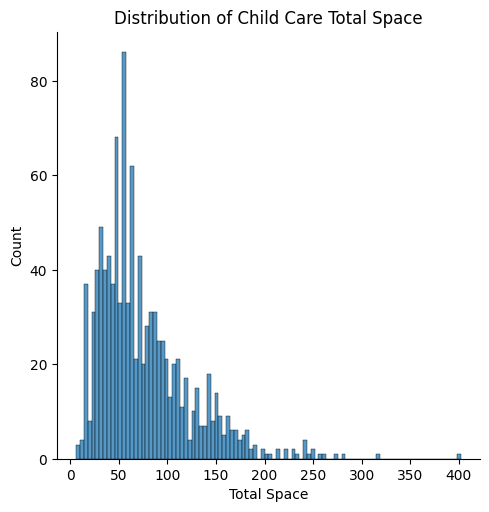

In [52]:
# histogram of samples
sns.displot(ChildCareDf['TOTSPACE'], bins=100)
plt.title('Distribution of Child Care Total Space')
plt.xlabel('Total Space')

The above histogram shows the distribution of child care total spaces for all age groups. By examining the above histogram, it is right skewed (positive skewness), which means that median could be more appropriate when measuring central tendency since mean could be influenced by outliers. This could also be seen as a unimodal since it has its highest peak at around 60. Other than that, potential outliers could also be detected, especially spaces greater than 250. Most of the data distributed before 100.

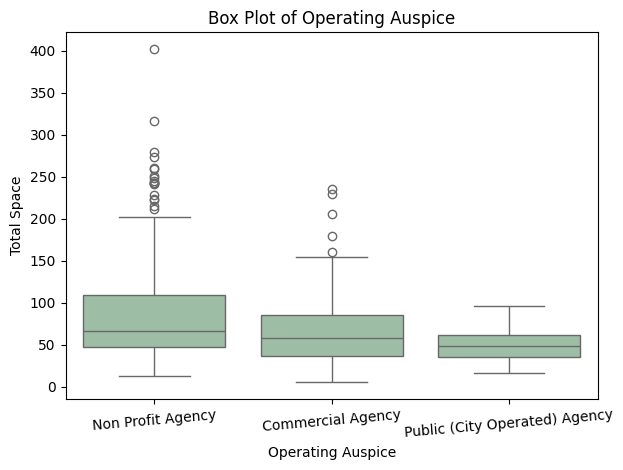

In [53]:
# generate a boxplot to see the data distribution by AUSPICE.
# Using boxplot to detect the differences between different AUSPICE
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=ChildCareDf, color='#99c2a2')
plt.title('Box Plot of Operating Auspice')
plt.ylabel('Total Space')
plt.xlabel('Operating Auspice')
plt.xticks(rotation=5)
plt.tight_layout()

The above box plot displays three different types of operating auspice: non profit agency, commercial agency, and public agency. By examining the plot, it shows that non profit agency total space count is the highest, followed by commercial agency and public agency. Both non profit agency and cpmmercial agency has a obvious trend of positive skewness (right skewed) while the public agency tend to have a normal distribution on the total space count. Both non profit and commercial agency have outliers. This shows that child care operating auspice tend to have more non profit agency.

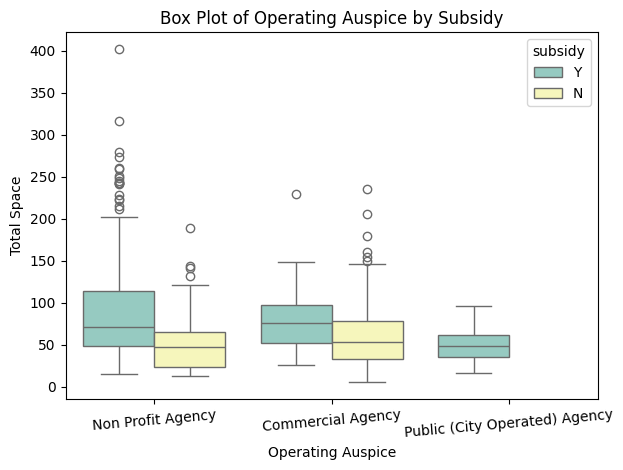

In [54]:
# generate a boxplot to see the data distribution of AUSPICE by subsidy.
sns.boxplot(x='AUSPICE', y='TOTSPACE', hue='subsidy',
            data=ChildCareDf, palette="Set3")
plt.title('Box Plot of Operating Auspice by Subsidy')
plt.ylabel('Total Space')
plt.xlabel('Operating Auspice')
plt.xticks(rotation=5)
plt.tight_layout()

The above combined box plot shows the distribution of total space count of different operating auspice by whether having subsidy. By examining the above plot, it shows that in general, child care spaces tend to have subsidy rather than not having it. \
For non profit agency, agencies having subsidy are more in count than not having subsidy. Both having and not having subsidy agencies space count are positively skewed and having outliers. \
For commercial agency, it seems that the space count for having and not having subsidy are similar, yet not having subsidy agancies space count has more outliers. The trend for both of them are slightly positively skewed as well.\
For public agency, it is very clear that all child care spaces under this agency have subsidy. It is also clear that the trend comparing to other agencies are more normally distributed.


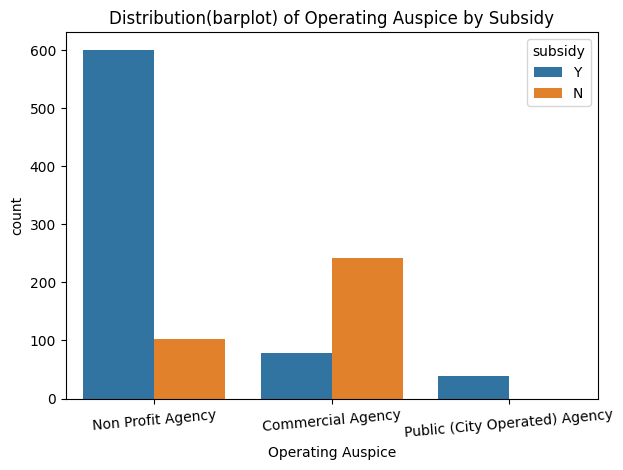

In [55]:
# Performing bar plot of the auspice by subsidy
sns.countplot(x='AUSPICE', hue='subsidy', data=ChildCareDf)
plt.title('Distribution(barplot) of Operating Auspice by Subsidy')
plt.xlabel('Operating Auspice')
plt.xticks(rotation=5)
plt.tight_layout()

The above combined barplot shows the count of each different operating auspice by whether they have subsidy. \
For non profit agency, it is very clear that most of this agency have subsidy. For commercial agency, it shows that most of it do not have subsidy. For public nagency, it is clear that this agency all have subsidy.\
However, in general, regardless of the type of operating auspice, most agencies have subsidy.

## One-way ANOVA

Null Hypothesis (H0): There is no significant difference in mean total child care spaces among child care centers with different auspices (Commercial, Non-Profit, Public).\
Alternative Hypothesis (H1): There is a significant difference in mean total child care spaces among child care centers with different auspices.


In [56]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=ChildCareDf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [57]:
# ANOVA table
res = stat()
res.anova_stat(df=ChildCareDf, res_var='TOTSPACE',
               anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


The p-value (PR(>F)) found in the above table is extremely low (p < 0.001) which suggests strong evidence against the null hypothesis. Therefore, it indicates that at least one pair of means among the operating auspice groups is significantly different.

In [58]:
# post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=ChildCareDf, res_var='TOTSPACE', xfac_var='AUSPICE',
              anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


 By examining the p-value of three pairs, it is obvious that there is a significant difference in mena total child care spaces between Non-Profit and Commercial Agencies, with Non-Profit Agency having a higher mean since the p-value is 0.001. Also, the mean total child care spaces for Non-Profit Agencies are significantly higher when compared to Public Agencies.

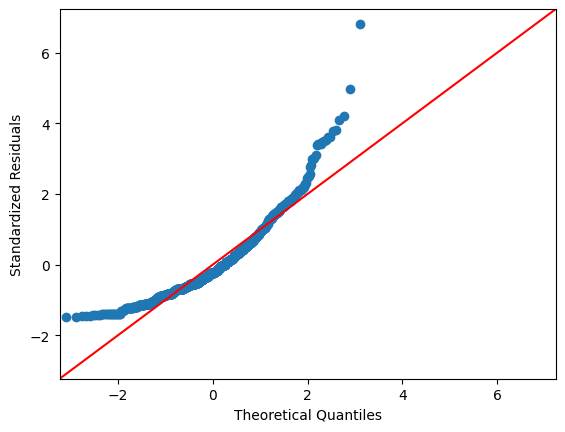

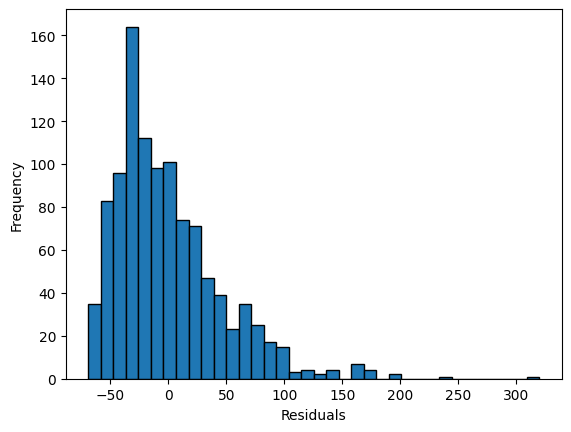

In [59]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

By examining the plot, while the central region aligns with the theoretical quantiles, the curve on the two sides suggest that the residuals may not perfectly follow normal distributions. The deviation could be due to non-constant variance or outliers. \
The right-skewed histogram indicates that the residuals have a tendency to be larger on the positive side. The unimodal distribution suggests a central tendency, while the outliers on the right indicates potential instances where the model does not fully capture variability.



In [60]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [61]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=ChildCareDf, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


since the p-value is less than the significance level, it indicates that there is strong evidence to reject the null hypothesis of equal variances. This violation of the assumption of homogeneity of variances may affect the reliability of the one-way ANOVA results.

## Two-way ANOVA

Null Hypotheses (H0):
There is no significant main effect of Auspice on the total childcare spaces.
There is no significant main effect of Subsidy Status on the total childcare spaces.
There is no significant interaction effect between Auspice and Subsidy Status on the total childcare spaces.\
Alternative Hypotheses (Ha):
There is a significant main effect of Auspice on the total childcare spaces.
There is a significant main effect of Subsidy Status on the total childcare spaces.
There is a significant interaction effect between Auspice and Subsidy Status on the total childcare spaces.


In [62]:
# Ordinary Least Squares (OLS) model
model=ols('TOTSPACE ~ C(subsidy) + C(AUSPICE) + C(subsidy):C(AUSPICE)',
          data=ChildCareDf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE),8.568144e+03,2.0,2.057622,1.282684e-01
C(subsidy):C(AUSPICE),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [63]:
# anova table
res = stat()
res.anova_stat(df=ChildCareDf, res_var='value',
               anova_model='TOTSPACE ~ C(subsidy) + C(AUSPICE) + C(subsidy):C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE),2.0,8.568144e+03,4284.072217,2.057622,1.282684e-01
C(subsidy):C(AUSPICE),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


 the p-value for both subsidy and the interaction between subsidy and auspice are less than 0.001, which suggests that there is a significant difference in total childcare spaces based on whether a center has a subsidy contract or not, and The interaction effect between Subsidy Status and Auspice is also statistically significant.


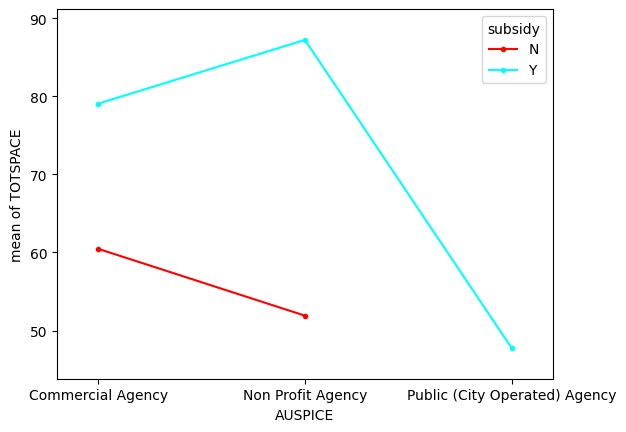

In [64]:
# import relevant oackages
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# plot interaction plot
fig = interaction_plot(x=ChildCareDf['AUSPICE'],trace=ChildCareDf['subsidy'],
                       response=ChildCareDf['TOTSPACE'])
plt.show()

The lines are not parallel suggests an interaction effect, meaning the effect of Auspice is dependent on whether there is a subsidy or not. For centers without a subsidy, the Total Spaces decrease from Commercial to Non-Profit. For centers with a subsidy, there is an increase from Commercial to Non-Profit and then a decrease from Non-Profit to Public.\
The direction of the lines (increasing or decreasing) indicates how the Total Childcare Spaces change for each Auspice level under different Subsidy conditions.


In [65]:
# post hoc test using Tukey's HSD: Auspice
res.tukey_hsd(df=ChildCareDf, res_var='TOTSPACE',xfac_var='AUSPICE',
              anova_model='TOTSPACE ~ C(subsidy) + C(AUSPICE) + C(subsidy):C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.905213,24.333621,7.876596,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.716448,51.952772,6.468588,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-0.945610,35.375996,3.146407,0.067567


p-value for both Non Profit Agency vs. Commercial Agency (p=0.0043) and Non Profit Agency vs. Public Agency (p=0.0042) are less than the significance level, indicating that there is significance in total child care spaces between these groups. On the other hand, Commercial Agency vs. Public Agency (p=0.250) is insignificant.


In [66]:
# post hoc test using Tukey's HSD: subsidy
res.tukey_hsd(df=ChildCareDf, res_var='TOTSPACE',xfac_var='subsidy',
              anova_model='TOTSPACE ~ C(subsidy) + C(AUSPICE) + C(subsidy):C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,26.265831,20.400592,32.13107,12.426982,0.001


The test results for subsidy status has a p-value = 0.001, which indicates a statistically significant difference between groups with and without subsidy.


In [67]:
# post hoc test using Tukey's HSD: Subsidy vs. Auspice
res.tukey_hsd(df=ChildCareDf, res_var='TOTSPACE',xfac_var=['AUSPICE', 'subsidy'],
              anova_model='TOTSPACE ~ C(subsidy) + C(AUSPICE) + C(subsidy):C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",35.327657,21.377488,49.277825,10.224542,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",8.165515,-7.512442,23.843471,2.102822,0.650278
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",26.764597,16.861524,36.667669,10.911871,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",39.460387,17.934574,60.986199,7.401338,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",27.162142,7.567922,46.756362,5.596861,0.001135
6,"(Non Profit Agency, N)","(Commercial Agency, N)",8.563060,-6.805934,23.932054,2.249531,0.590448
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.132730,-20.392680,28.658140,0.680345,0.900000
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
9,"(Commercial Agency, Y)","(Commercial Agency, N)",18.599082,1.646292,35.551872,4.429542,0.021963


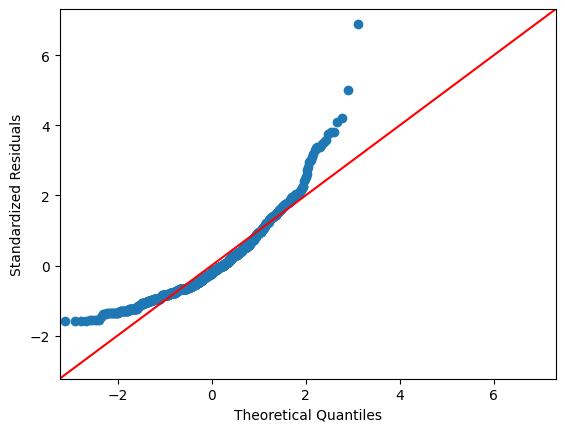

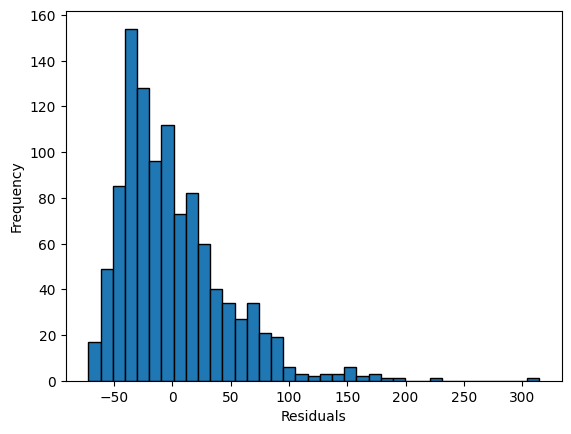

In [68]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [69]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9018619656562805 1.5311055543621852e-25


In [70]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=ChildCareDf, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [71]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=ChildCareDf, res_var='TOTSPACE', xfac_var='subsidy')
res.levene_summary

,Parameter,Value
0,Test statistics (W),22.9889
1,Degrees of freedom (Df),1.0000
2,p value,0.0000
